**DATA ANALYSIS OF MICROSOFT WINDOWS STORE REVIEW**

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print ("Libraries imported Successfully")

Libraries imported Successfully


#### Read Data

In [4]:
ms_df = pd.read_csv(r'C:\Users\izzie\Downloads\msft.csv')

In [5]:
ms_df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [6]:
ms_df.shape

(5322, 6)

In [7]:
ms_df.describe()

,Rating,No of people Rated
count,5321.000000,5322.000000
mean,3.792708,551.873168
std,0.991681,259.820088
min,1.000000,100.000000
25%,3.500000,327.000000
50%,4.000000,548.000000
75%,4.500000,779.000000
max,5.000000,1000.000000


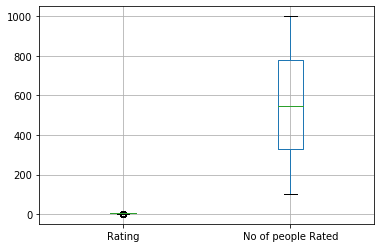

In [8]:
ms_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175C122D088>,
      dtype=object)

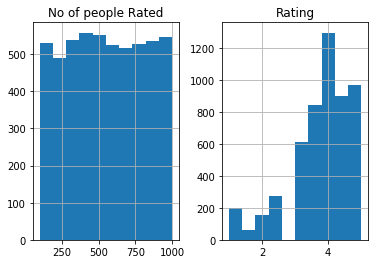

In [9]:
ms_df.hist()

In [10]:
ms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


## Data Cleaning
###### Count the number of missing values in the dataframe

In [11]:
ms_df.isnull()

,Name,Rating,No of people Rated,Category,Date,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5317,False,False,False,False,False,False
5318,False,False,False,False,False,False
5319,False,False,False,False,False,False
5320,False,False,False,False,False,False


In [12]:
# Count the number of missing values in each column
ms_df.isnull().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

#### Check how many ratings are more than 5 - Outliers

In [13]:
ms_df[ms_df.Rating > 5]

,Name,Rating,No of people Rated,Category,Date,Price


#### Remove columns that are 90% empty

In [14]:
threshold = len(ms_df)* 0.1
threshold

532.2

In [15]:
ms_df.dropna(thresh=threshold, axis=1, inplace=True)

In [16]:
print(ms_df.isnull().sum())

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64


In [18]:
ms_df = ms_df.dropna()

In [19]:
print(ms_df.isnull().sum())

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64


In [21]:
ms_df.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                  object
dtype: object

In [22]:
ms_df['Price'] = pd.to_numeric(ms_df['Price'], errors='coerce')

C:\Users\izzie\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Data Visualisation

In [24]:
ms_df['Category'].value_counts()

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64

In [23]:
ms_df.head(10)

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,NaN
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,NaN
2,BookViewer,3.5,593,Books,29-02-2016,NaN
3,Brick Instructions,3.5,684,Books,30-01-2018,NaN
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,NaN
5,Gurbani Reader,4.5,399,Books,18-01-2017,NaN
6,NFO Viewer,4.5,566,Books,13-11-2012,NaN
7,Text to Speech TTS,3.0,175,Books,17-10-2013,NaN
8,ACK Comics,4.0,460,Books,20-12-2012,NaN
9,Learn Biology and Human Body Anatomy by GoLear...,3.5,363,Books,25-11-2013,NaN


In [25]:
grp = ms_df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['No of people Rated'].agg(np.mean)
print(x)
print(y)
print(z)

Category
Books                      3.791372
Business                   3.602356
Developer Tools            3.886000
Food and Dining            3.789157
Government and Politics    4.050000
Health and Fitness         3.785579
Kids and Family            3.947826
Lifestyle                  3.850610
Multimedia Design          3.551282
Music                      3.759628
Navigation and Maps        3.801948
News and Weather           3.837474
Social                     3.847561
Name: Rating, dtype: float64
Category
Books                      0.0
Business                   0.0
Developer Tools            0.0
Food and Dining            0.0
Government and Politics    0.0
Health and Fitness         0.0
Kids and Family            0.0
Lifestyle                  0.0
Multimedia Design          0.0
Music                      0.0
Navigation and Maps        0.0
News and Weather           0.0
Social                     0.0
Name: Price, dtype: float64
Category
Books                      548.545969
Busines

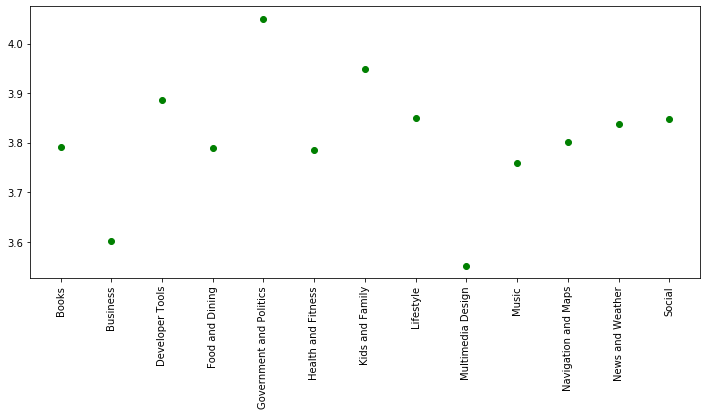

In [26]:

plt.figure(figsize=(12,5))
plt.plot(x, "ro", color='g')
plt.xticks(rotation=90)
plt.show()

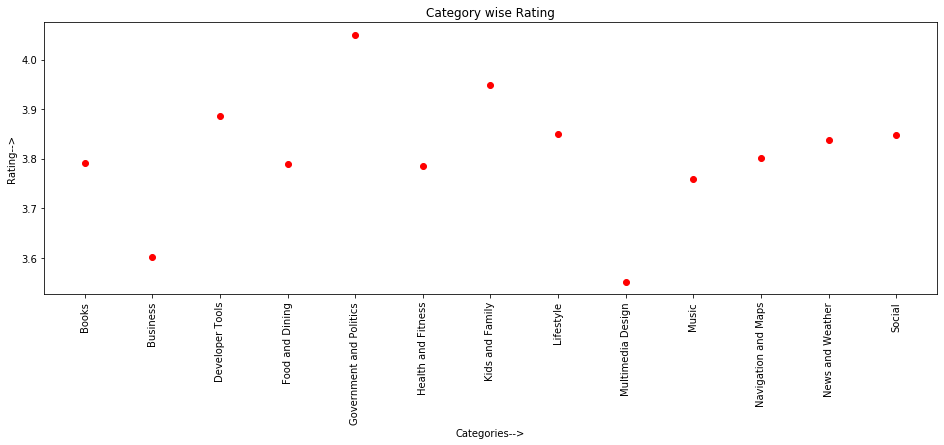

In [27]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

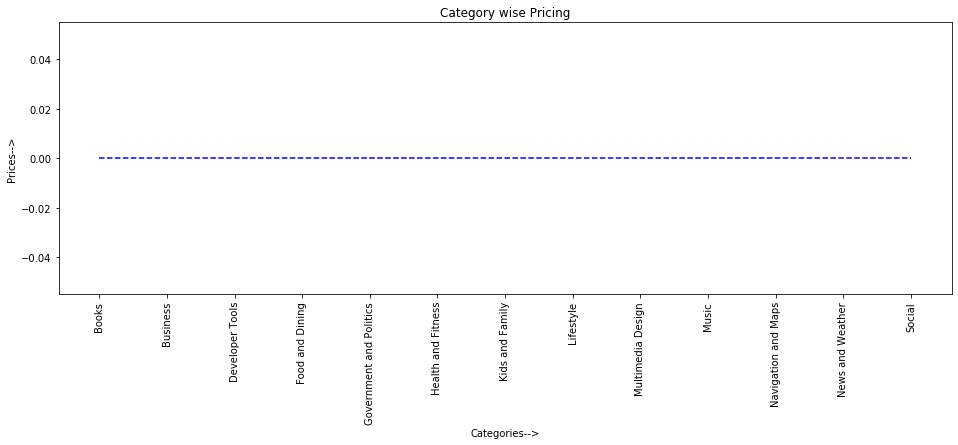

In [28]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

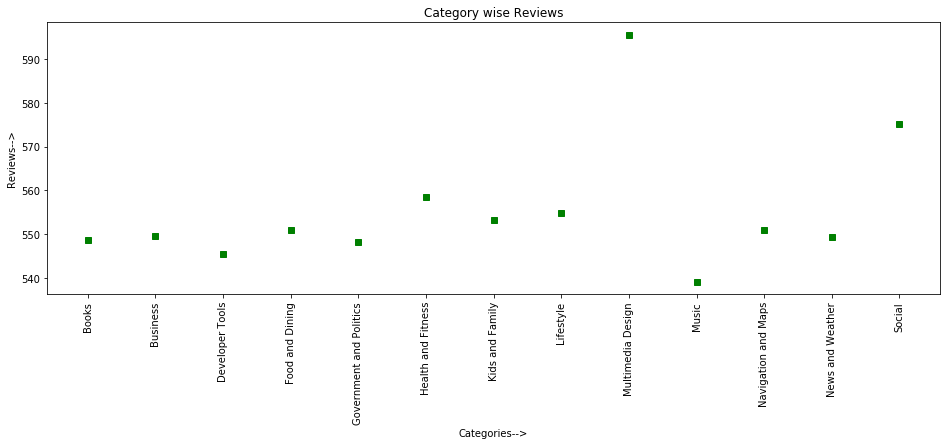

In [29]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()